In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Non-linear Regression

In [3]:
x = np.linspace(0, 10, 100)
y = np.exp(x)

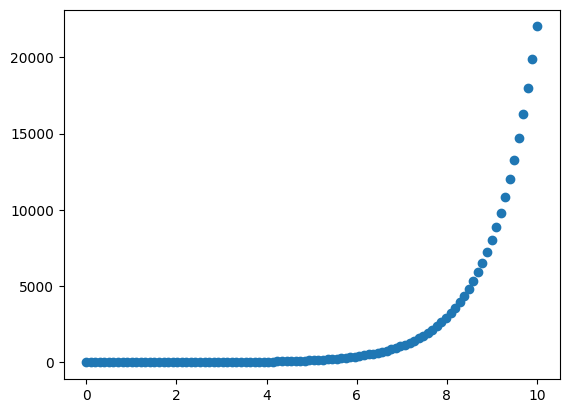

In [4]:
plt.scatter(x, y)

y^ = θ + θ1 * θ2^x

- Exponantial
- Quadratic
- Cubic
- ...

### Non-linear regression
- non-linear relationship between the dependet variable and a set of independent variables
- For a model to be considered non-linear y^ must be a non-linear function of the paramaters θ, not necessarily the features of x.
- in Non-linear regression, a model is non-linear by parameters.

How can I know if a problem is linear or non-linear?
- Visually figure out relation
- Calculate the correlation coefficient between independet and dependent variables
    - if for all variables it is 0.7 or higher there is a linearity, and it's not appropriate to fit a non-linear regression.


How should I model my data, if it displays non-linear on a scatterplot?
- Polynomial regression
- Non-linear regression model
- Transform your data

### Polynomial Regression

y^ = θ0 + θ1 * x + θ2 * x^2 + θ3 * x^3

Polynomial regression is considered to be a special case of traditional multiple linear regression.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv("data/FuelConsumption.csv")

In [7]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

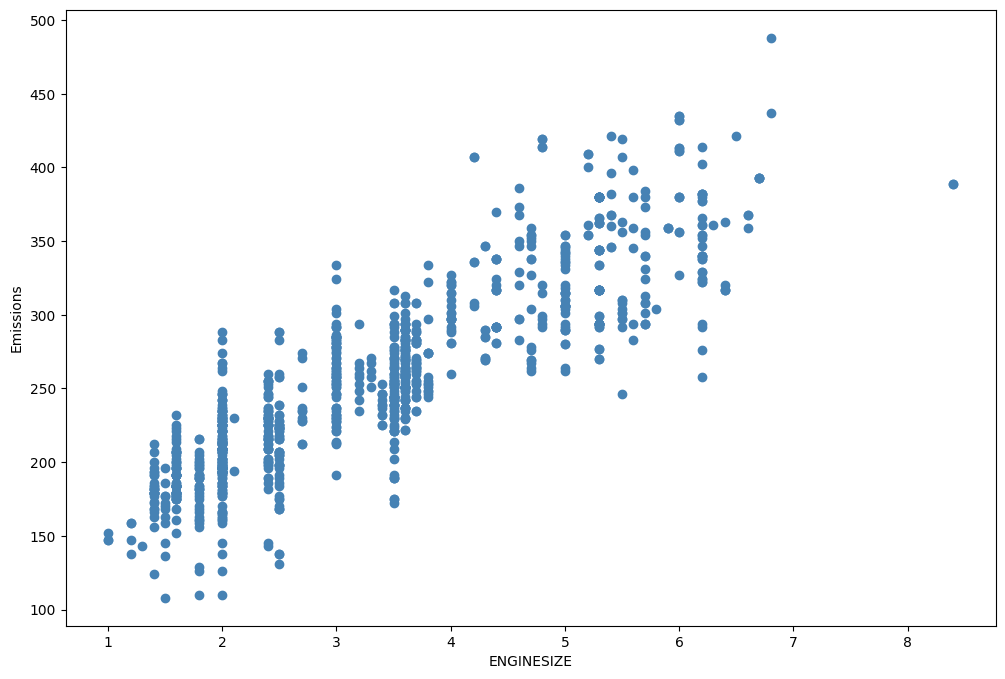

In [10]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.
2nd degree:
y = θ0 + θ1 x + θ2 x^2

In [14]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

In [15]:
poly = PolynomialFeatures(degree=2)

In [16]:
train_x_poly = poly.fit_transform(train_x)

In [17]:
print(train_x_poly)

[[ 1.    3.7  13.69]
 [ 1.    5.4  29.16]
 [ 1.    2.5   6.25]
 ...
 [ 1.    3.5  12.25]
 [ 1.    3.    9.  ]
 [ 1.    2.    4.  ]]


In [18]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [19]:
train_y_ = clf.fit(train_x_poly, train_y)

In [20]:
# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.60182992 -1.49947283]]
Intercept: [106.80896893]


y^ = θ0 + θ1 * x + θ2 * x^2

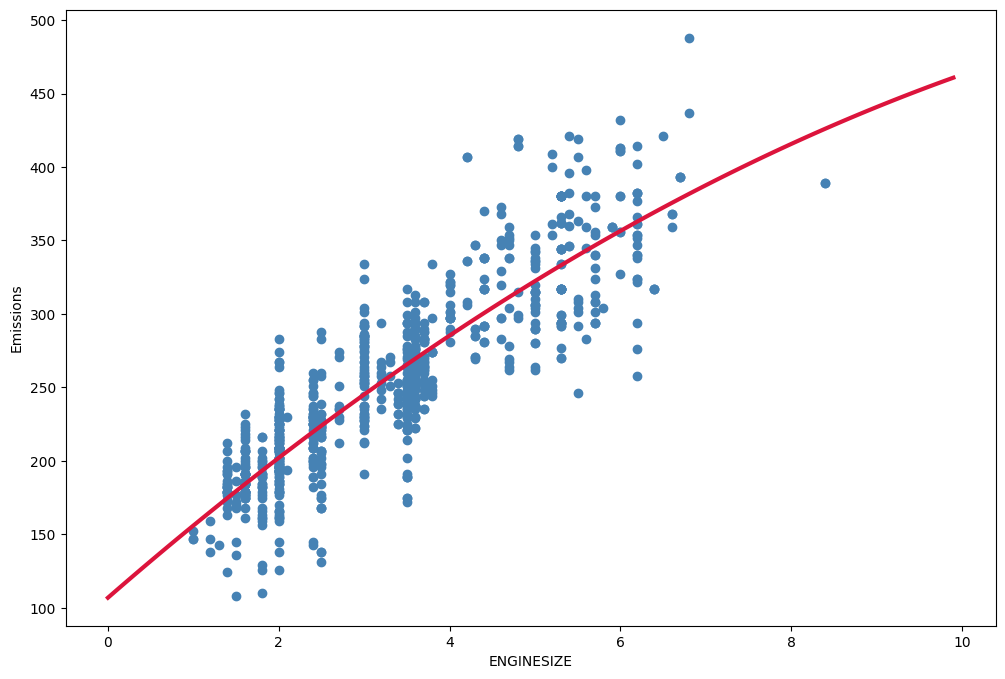

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)

plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

### Evaluation

In [23]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

In [28]:
print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):}")

Mean Absolute Error (MAE): 22.01
Mean Squared Error (MSE): 799.70
R2-Score: 0.791000184269982


In [25]:
poly3 = PolynomialFeatures(degree=3)
train_x_3 = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_3, train_y)

In [26]:
# The coefficients
print("Coefficients:", clf3.coef_)
print("Intercept:", clf3.intercept_)

Coefficients: [[ 0.         26.5367309   5.10356914 -0.54461087]]
Intercept: [132.4218363]


Mean absolute error: 22.14
Residual sum of squares (MSE): 803.12
R2-score: 0.790107524529839


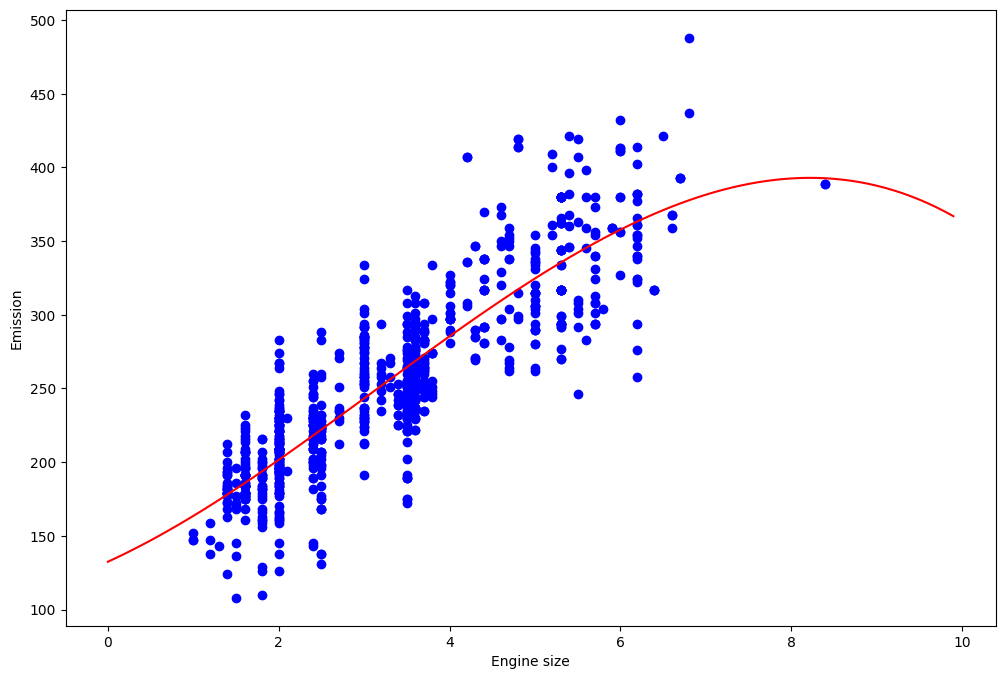

In [30]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score:", r2_score(test_y,test_y3_ ) )

## Non-linear Regression Examples

In [36]:
x = np.arange(-5.0, 5.0, 0.1)

In [37]:
y = 3 + 2*(x)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

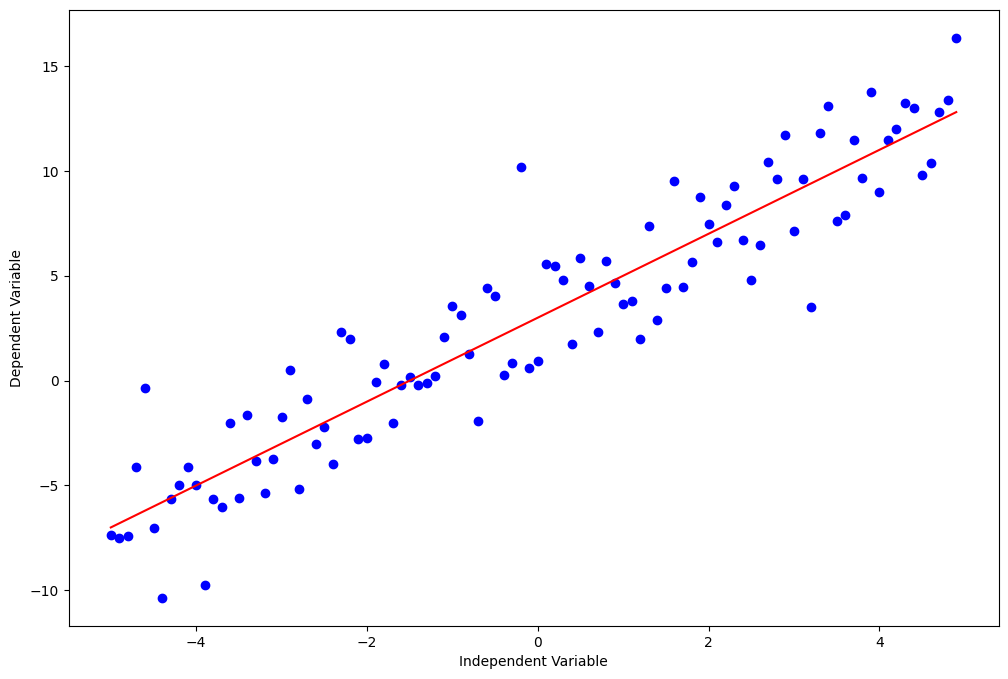

In [38]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [39]:
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise

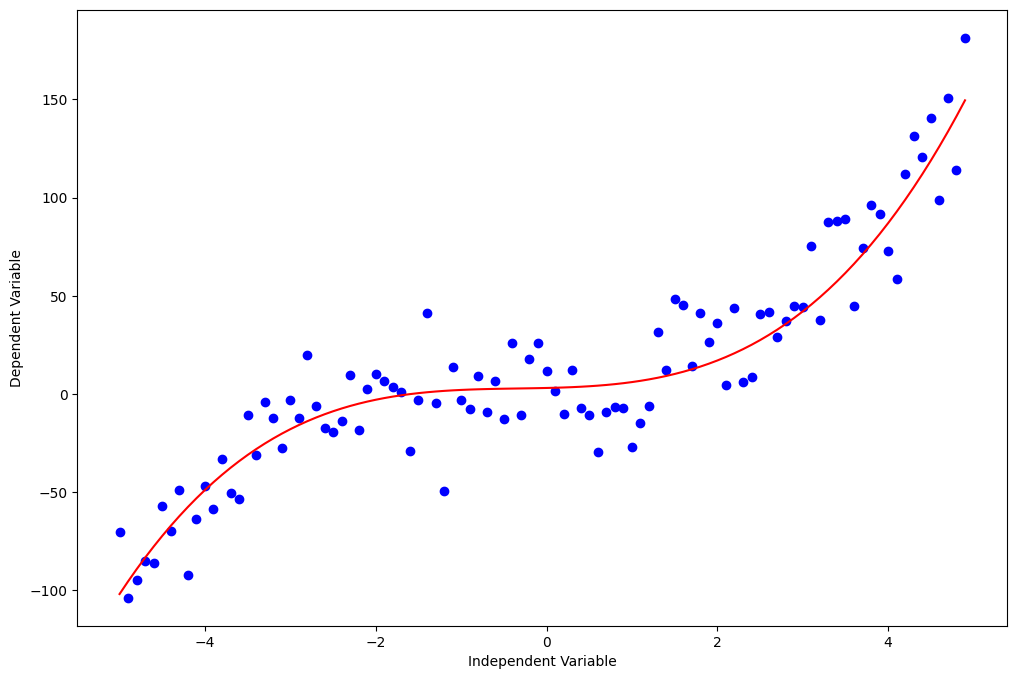

In [40]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- Quadratic

y = x^2

In [42]:
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

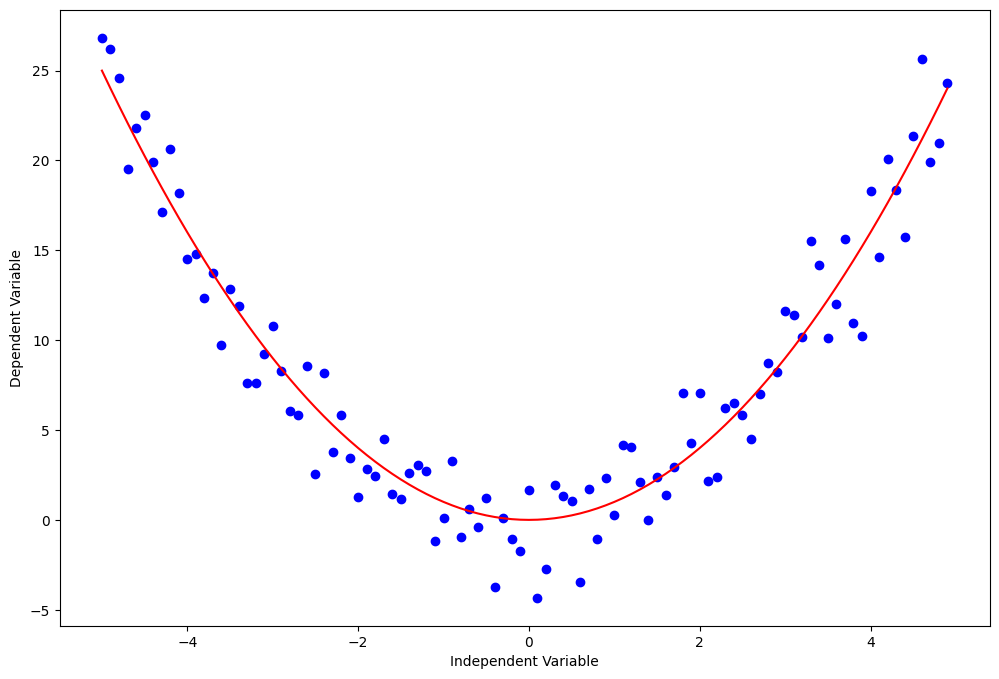

In [43]:
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- Exponential

Y = a + b * c^x

In [44]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)

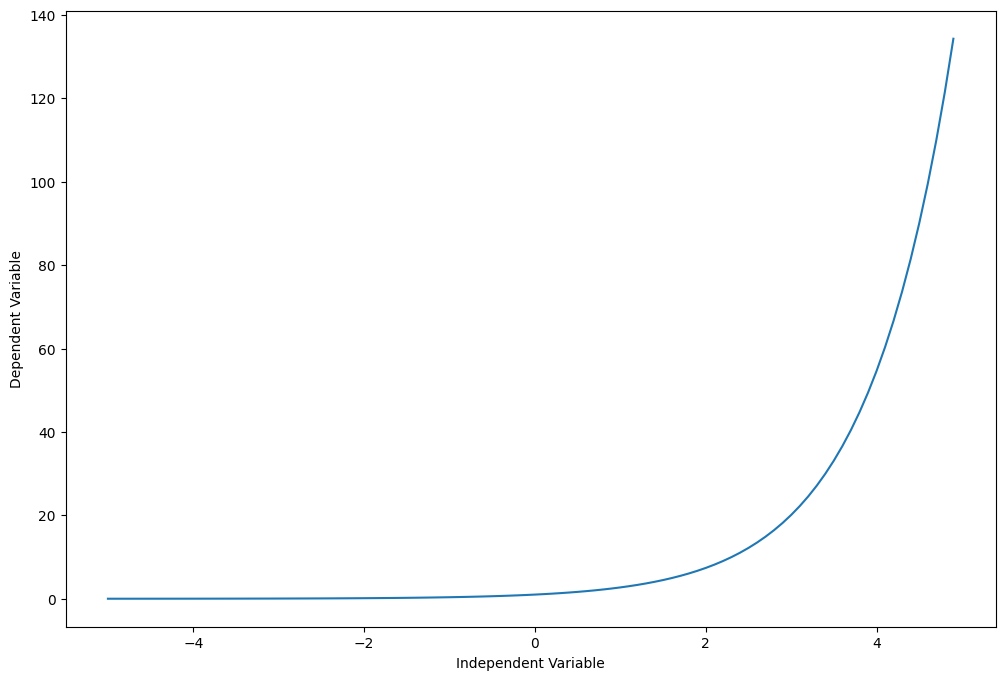

In [45]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

- Logarithmic

y = log(x)

In [46]:
X = np.arange(1.0, 100.0, 0.1)

Y = np.log(X)

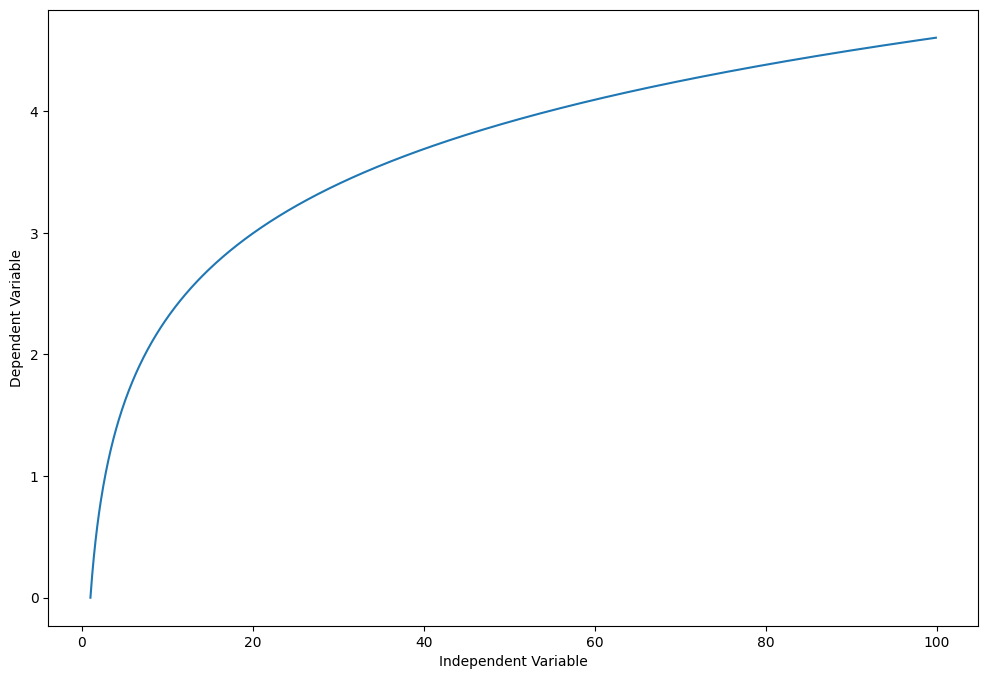

In [47]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Logistic / Sigmoid

Y = a + (b / 1 + c ^ (X-d))

In [48]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

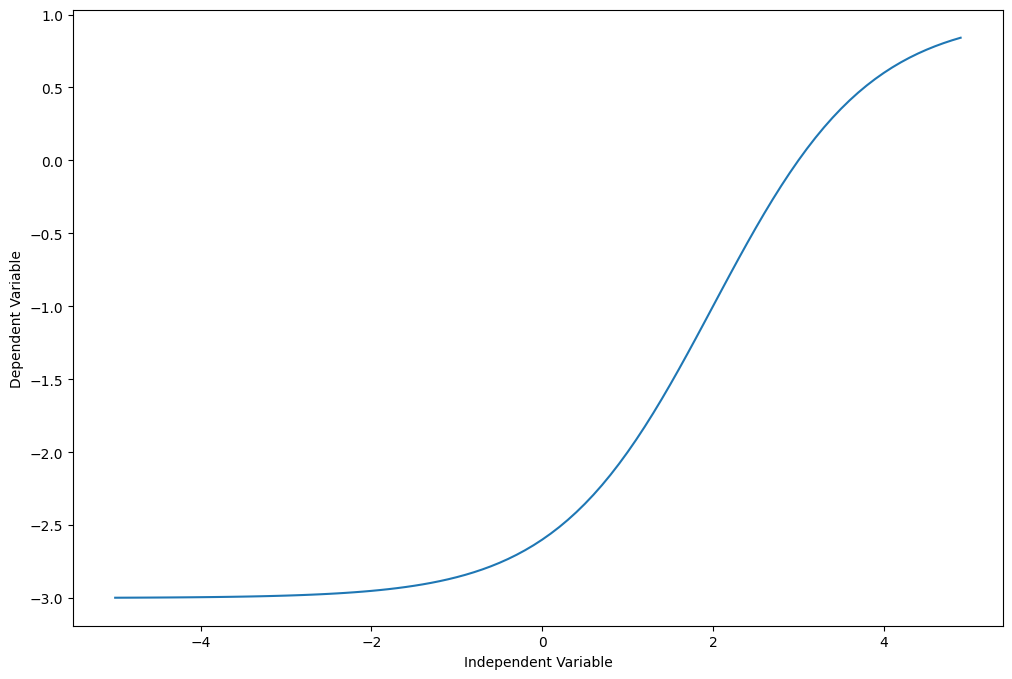

In [49]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [51]:
# Example

df = pd.read_csv("data/china_gdp.csv")

In [52]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


### Practice

1- Choose a model for data set. Which one will be best fit?
- Exponential
- Sigmoid (you can use curve_fit)

2- Calculate what is the accuracy of your model.

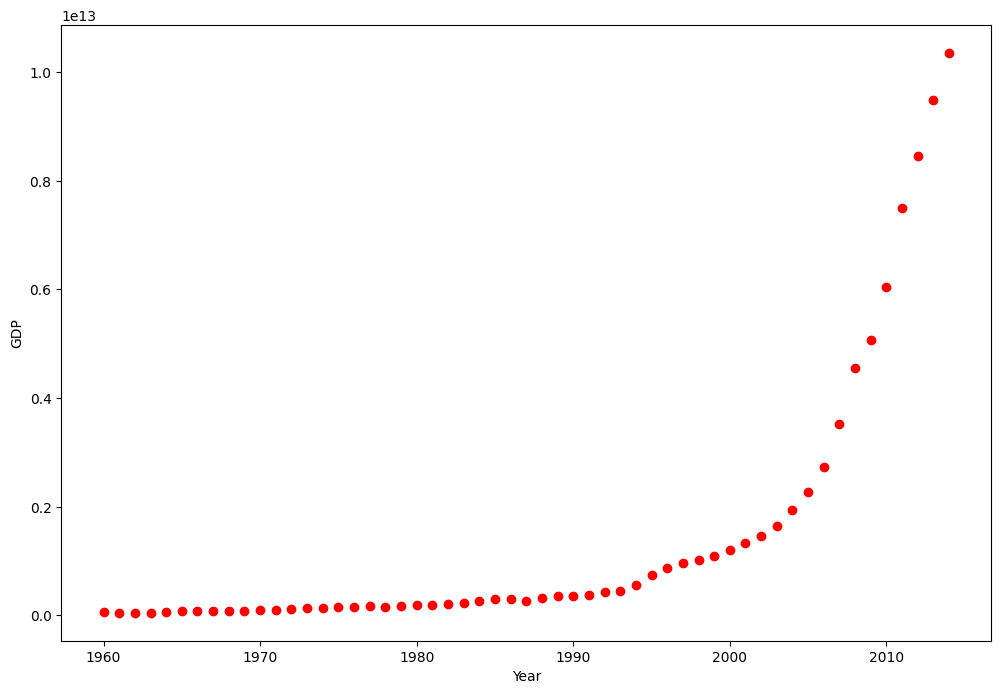

In [53]:
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

In [60]:
df.tail()

,Year,Value
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


In [54]:
df.shape

(55, 2)

In [55]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [56]:
x = np.linspace(-10, 10, 100)

y = sigmoid(x)
d = d_sigmoid(x)

In [57]:
sdf = pd.DataFrame({"x": x, "sigmoid(x)": y, "d_sigmoid(x)": d})

In [58]:
sdf.head()

,x,sigmoid(x),d_sigmoid(x)
0,-10.000000,0.000045,0.000045
1,-9.797980,0.000056,0.000056
2,-9.595960,0.000068,0.000068
3,-9.393939,0.000083,0.000083
4,-9.191919,0.000102,0.000102


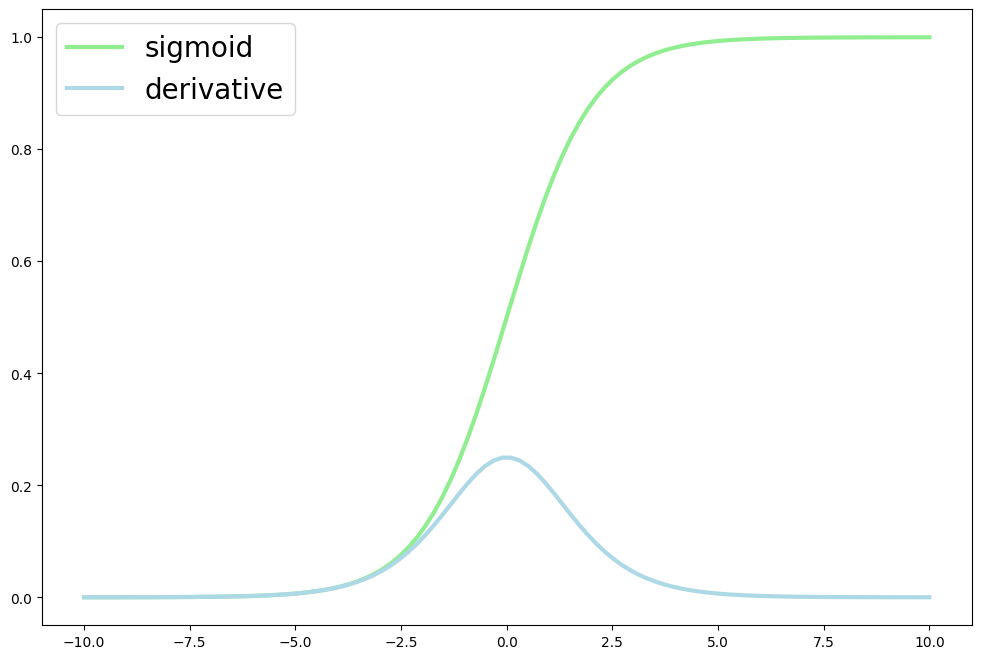

In [59]:
plt.plot(x, y, c="lightgreen", linewidth=3.0, label="sigmoid")
plt.plot(x, d, c="lightblue", linewidth=3.0, label="derivative")

plt.legend(prop={'size': 20})
plt.show()

In [63]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [64]:
beta_1 = 0.1
beta_2 = 1990

Y_pred = sigmoid(x_data, beta_1 , beta_2)

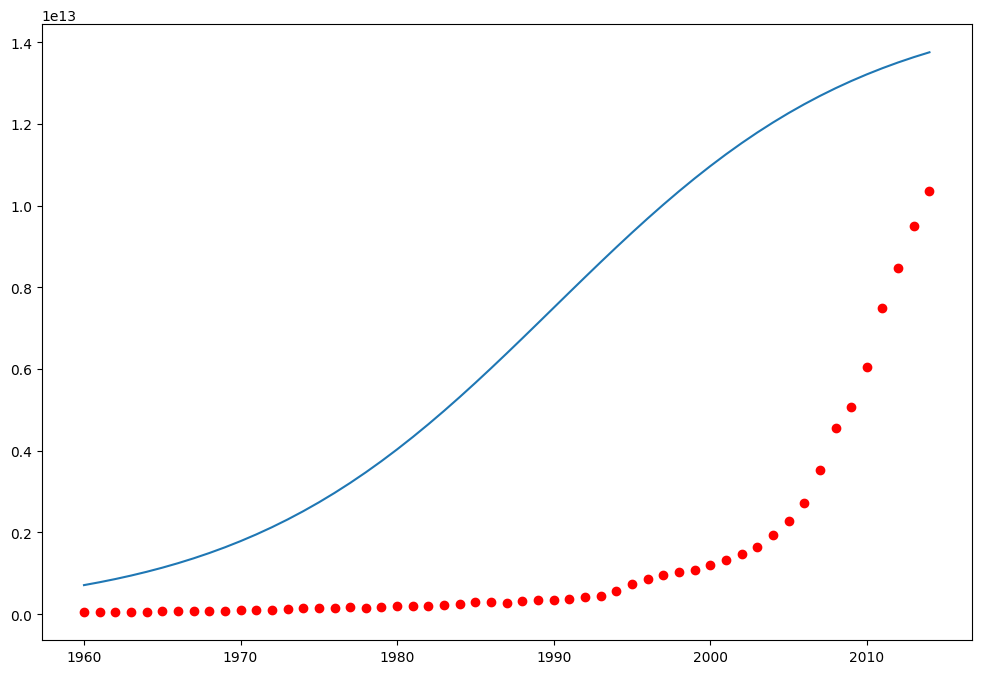

In [65]:
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [66]:
from scipy.optimize import curve_fit

In [67]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [68]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451709, beta_2 = 0.997207


In [71]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
y = sigmoid(x, *popt)

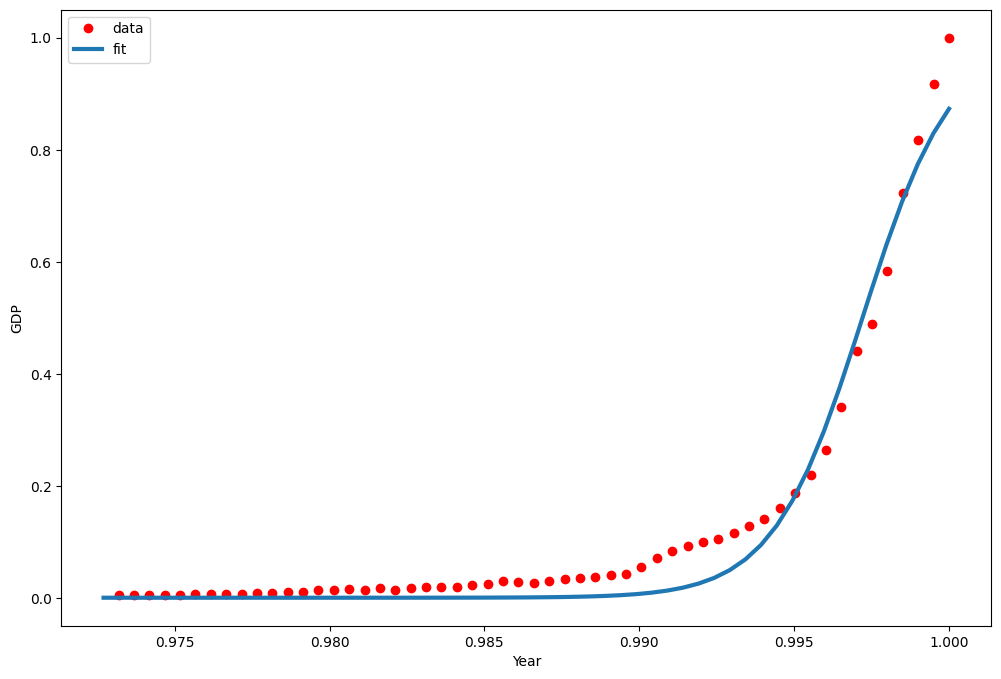

In [72]:
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()